# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 657


In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"
print(weather_api_key)

01eb8bdb5327b9ce5676ed932836b86a


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
print(weather_api_key)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url+city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15 # Minus 273.15 to convert the temperature into Celsius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


01eb8bdb5327b9ce5676ed932836b86a
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ryotsu
Processing Record 2 of Set 1 | tonantins
Processing Record 3 of Set 1 | palu
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | kharagpur
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | rundu
Processing Record 11 of Set 1 | goias
Processing Record 12 of Set 1 | gari
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | manono
Processing Record 17 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | imbituba
Processing Record 

Processing Record 37 of Set 4 | almaznyy
Processing Record 38 of Set 4 | chuy
Processing Record 39 of Set 4 | honiara
Processing Record 40 of Set 4 | los llanos de aridane
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | pallasovka
Processing Record 43 of Set 4 | yumen
Processing Record 44 of Set 4 | kenai
Processing Record 45 of Set 4 | antalya
Processing Record 46 of Set 4 | labuhan
Processing Record 47 of Set 4 | trencianske teplice
Processing Record 48 of Set 4 | talcahuano
Processing Record 49 of Set 4 | selfoss
Processing Record 0 of Set 5 | quatre cocos
Processing Record 1 of Set 5 | chiungutwa
Processing Record 2 of Set 5 | saint-pierre
Processing Record 3 of Set 5 | bolshaya glushitsa
Processing Record 4 of Set 5 | sungaipenuh
Processing Record 5 of Set 5 | morondava
Processing Record 6 of Set 5 | cabo san lucas
Processing Record 7 of Set 5 | sinnamary
Processing Record 8 of Set 5 | river falls
Processing Record 9 of Set 5 | torbat-e jam
Processin

City not found. Skipping...
Processing Record 28 of Set 8 | linden
Processing Record 29 of Set 8 | capela do alto
Processing Record 30 of Set 8 | severo-kurilsk
Processing Record 31 of Set 8 | santa maria
Processing Record 32 of Set 8 | bridlington
Processing Record 33 of Set 8 | owensboro
Processing Record 34 of Set 8 | makokou
Processing Record 35 of Set 8 | thunder bay
Processing Record 36 of Set 8 | kaharlyk
Processing Record 37 of Set 8 | naryan-mar
Processing Record 38 of Set 8 | tawzar
City not found. Skipping...
Processing Record 39 of Set 8 | shingu
Processing Record 40 of Set 8 | forestville
Processing Record 41 of Set 8 | dongsheng
Processing Record 42 of Set 8 | santo angelo
Processing Record 43 of Set 8 | pelotas
Processing Record 44 of Set 8 | warmbad
Processing Record 45 of Set 8 | cap malheureux
Processing Record 46 of Set 8 | cidreira
Processing Record 47 of Set 8 | clyde river
Processing Record 48 of Set 8 | bahia honda
Processing Record 49 of Set 8 | franca
Processin

Processing Record 15 of Set 12 | black river
Processing Record 16 of Set 12 | dongying
Processing Record 17 of Set 12 | sao mateus do sul
Processing Record 18 of Set 12 | duku
Processing Record 19 of Set 12 | san rafael
Processing Record 20 of Set 12 | rapid valley
Processing Record 21 of Set 12 | tocopilla
Processing Record 22 of Set 12 | portland
Processing Record 23 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 24 of Set 12 | lata
Processing Record 25 of Set 12 | garowe
Processing Record 26 of Set 12 | gubskaya
Processing Record 27 of Set 12 | abu samrah
Processing Record 28 of Set 12 | ferrol
Processing Record 29 of Set 12 | saint anthony
Processing Record 30 of Set 12 | vallenar
Processing Record 31 of Set 12 | khor
Processing Record 32 of Set 12 | balkhash
Processing Record 33 of Set 12 | kupang
Processing Record 34 of Set 12 | hanzhong
Processing Record 35 of Set 12 | salekhard
Processing Record 36 of Set 12 | tyret pervaya
Processing Record 37 of Set 12 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          607
Lat           607
Lng           607
Max Temp      607
Humidity      607
Cloudiness    607
Wind Speed    607
Country       607
Date          607
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ryotsu,38.0833,138.4333,12.10,82,100,1.69,JP,1680705007
1,tonantins,-2.8731,-67.8022,30.75,57,99,1.33,BR,1680705009
2,palu,-0.8917,119.8707,24.35,95,99,0.79,ID,1680705011
3,rikitea,-23.1203,-134.9692,25.58,79,66,3.51,PF,1680705012
4,kharagpur,22.3333,87.3333,32.30,17,1,3.56,IN,1680705015


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ryotsu,38.0833,138.4333,12.10,82,100,1.69,JP,1680705007
1,tonantins,-2.8731,-67.8022,30.75,57,99,1.33,BR,1680705009
2,palu,-0.8917,119.8707,24.35,95,99,0.79,ID,1680705011
3,rikitea,-23.1203,-134.9692,25.58,79,66,3.51,PF,1680705012
4,kharagpur,22.3333,87.3333,32.30,17,1,3.56,IN,1680705015


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

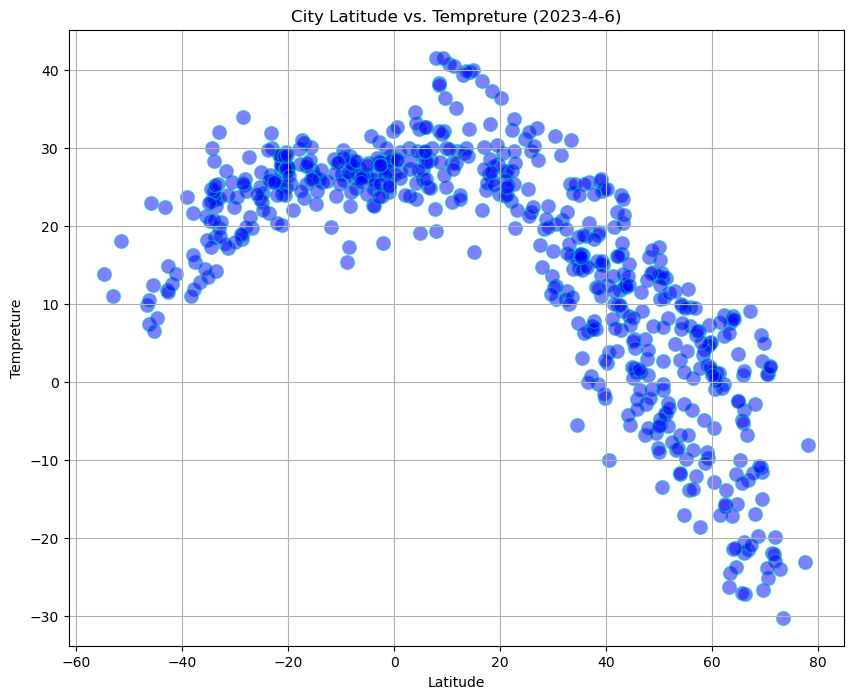

In [22]:
# Function to convert timestamp into normal form of datetime and then extract and return the year, month and day as a list
def date_conv(time_stamp):
    date_run = time.localtime(time_stamp)
    date = [date_run.tm_year, date_run.tm_mon, date_run.tm_mday]
    return date

# Build the scatter plots for latitude vs. tempreture
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')

# Call function to convert the data retrieval date from timestamp into normal form of datetime
date = date_conv(city_data_df["Date"][0])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Tempreture')
plt.title(f'City Latitude vs. Tempreture ({date[0]}-{date[1]}-{date[2]})') # Print title with data retrieval date
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

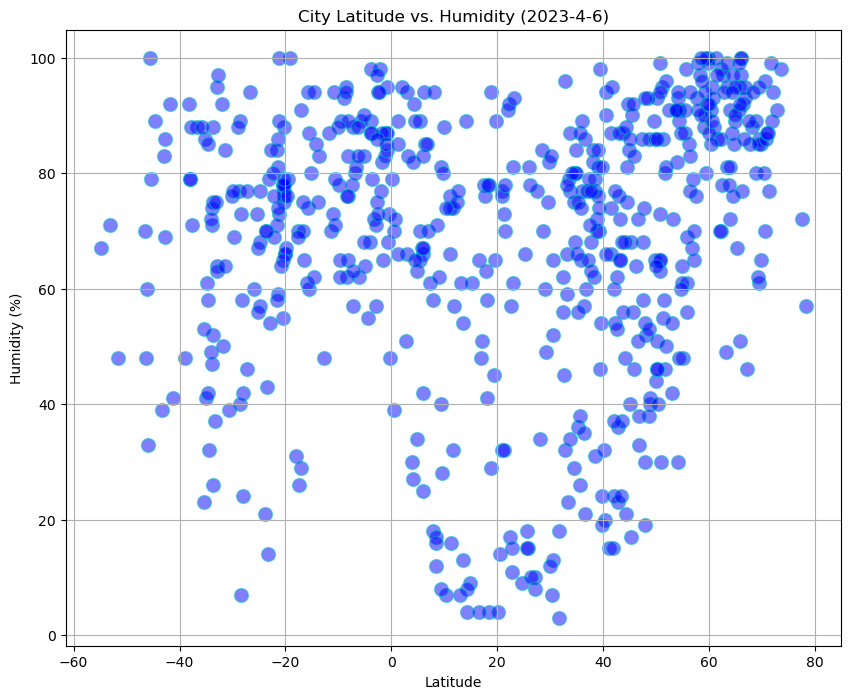

In [24]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')

# Call function to convert the data retrieval date from timestamp into normal form of datetime
date = date_conv(city_data_df["Date"][0])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date[0]}-{date[1]}-{date[2]})') # Print title with data retrieval date
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

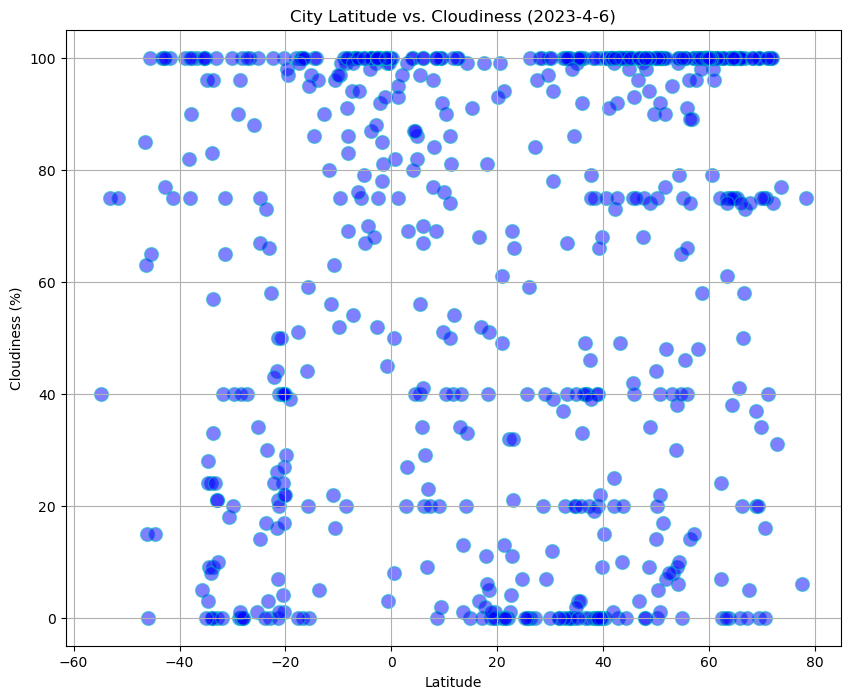

In [25]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')

# Call function to convert the data retrieval date from timestamp into normal form of datetime
date = date_conv(city_data_df["Date"][0])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date[0]}-{date[1]}-{date[2]})') # Print title with data retrieval date
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

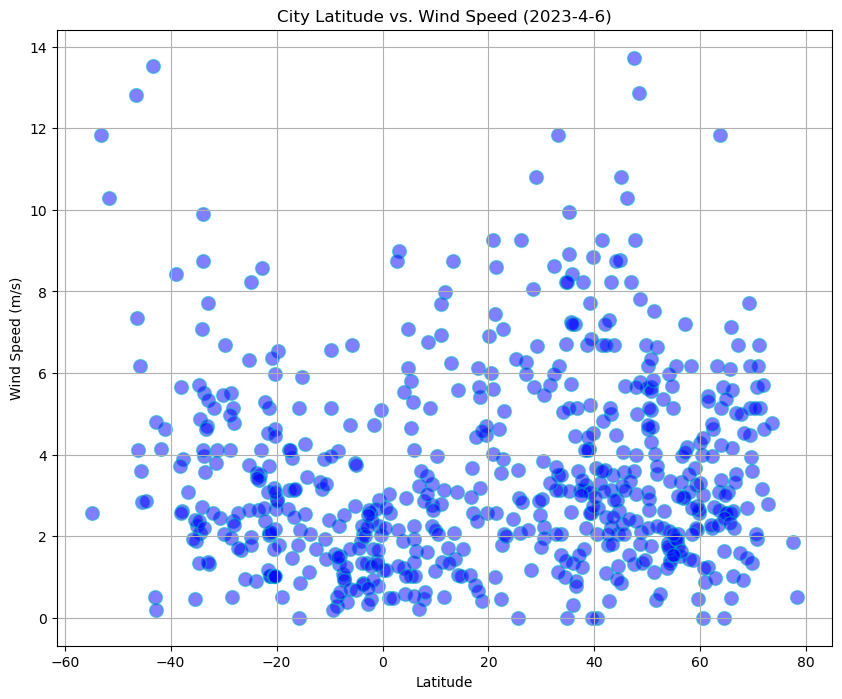

In [26]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.figure(figsize=(10, 8))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", s=100, alpha=0.5, color='c')

# Call function to convert the data retrieval date from timestamp into normal form of datetime
date = date_conv(city_data_df["Date"][0])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Latitude vs. Wind Speed ({date[0]}-{date[1]}-{date[2]})') # Print title with data retrieval date
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a Function to create Linear Regression plots
def plot_lin_reg(x_values,y_values,xy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    #Print the r-value out


In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ryotsu,38.0833,138.4333,12.10,82,100,1.69,JP,1680705007
4,kharagpur,22.3333,87.3333,32.30,17,1,3.56,IN,1680705015
5,albany,42.6001,-73.9662,11.79,62,92,1.79,US,1680705001
10,gari,59.4307,62.3497,7.23,80,100,2.14,RU,1680705023
13,upernavik,72.7868,-56.1549,-23.95,91,31,2.78,GL,1680705025


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tonantins,-2.8731,-67.8022,30.75,57,99,1.33,BR,1680705009
2,palu,-0.8917,119.8707,24.35,95,99,0.79,ID,1680705011
3,rikitea,-23.1203,-134.9692,25.58,79,66,3.51,PF,1680705012
6,bluff,-46.6000,168.3333,9.82,70,85,12.81,NZ,1680705019
7,hobart,-42.8794,147.3294,11.70,83,100,0.51,AU,1680705020


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8495139691262035


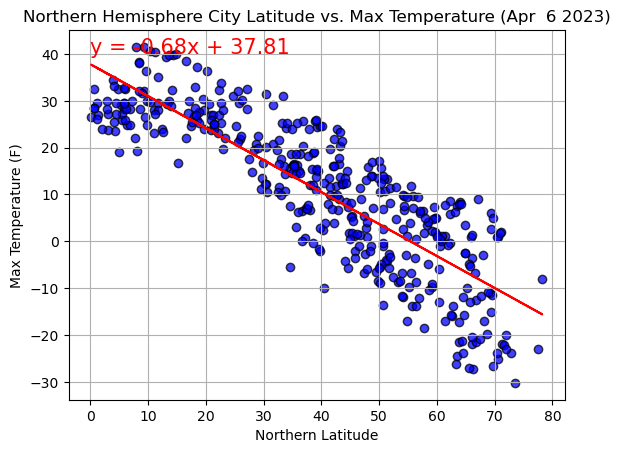

In [30]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0 ),:]

#convert unix code date date to normal date time data
todays_date = time.ctime(city_data_df['Date'][0])
#define the date information to be used on all plots
plot_date = todays_date[4:-14]
plot_year = todays_date[-4:]
plt.title(f"City Latitude vs. Max Temperature ({plot_date} {plot_year})")

# follow the same procedure as previously used to produce scatter plot
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature ({plot_date} {plot_year})")

#go through the steps of linear regression plotting 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,40),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

#save file
plt.savefig("../output_data/Fig5.png")

#repeat this process several times for the other graphs

The r-value is: -0.8495139691262035


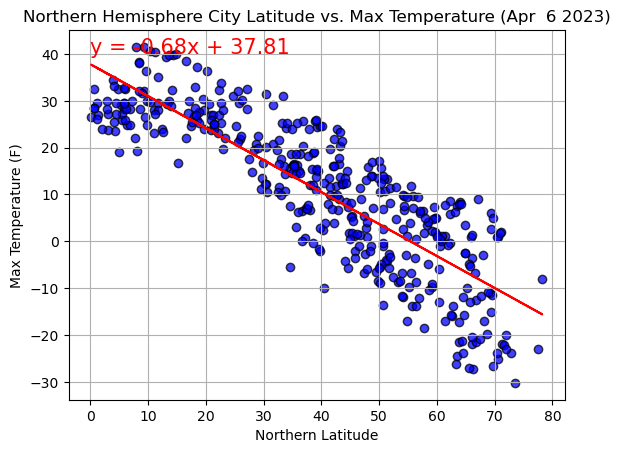

In [31]:
# Linear regression on Northern Hemisphere

northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0 ),:]

#convert unix code date date to normal date time data
todays_date = time.ctime(city_data_df['Date'][0])
#define the date information to be used on all plots
plot_date = todays_date[4:-14]
plot_year = todays_date[-4:]
plt.title(f"City Latitude vs. Max Temperature ({plot_date} {plot_year})")

# follow the same procedure as previously used to produce scatter plot
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature ({plot_date} {plot_year})")

#go through the steps of linear regression plotting 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,40),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

#save file
plt.savefig("../output_data/Fig6.png")



The r-value is: 0.6354787097170035


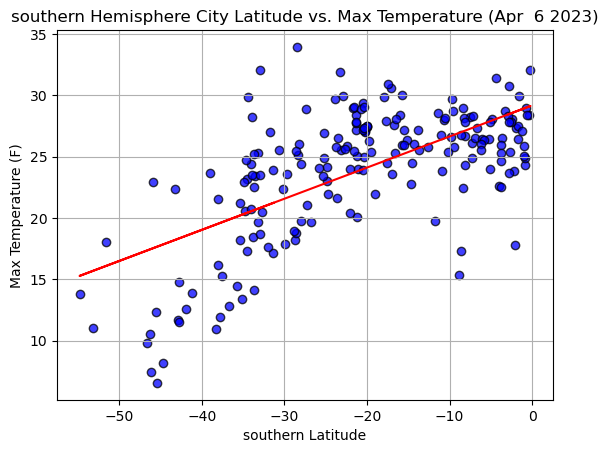

In [32]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0 ),:]

#convert unix code date date to normal date time data
todays_date = time.ctime(city_data_df['Date'][0])
#define the date information to be used on all plots
plot_date = todays_date[4:-14]
plot_year = todays_date[-4:]
plt.title(f"City Latitude vs. Max Temperature ({plot_date} {plot_year})")

# follow the same procedure as previously used to produce scatter plot
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('southern Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f"southern Hemisphere City Latitude vs. Max Temperature ({plot_date} {plot_year})")

#go through the steps of linear regression plotting 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,40),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

#save file
plt.savefig("../output_data/Fig7.png")

#repeat this process several times for the other graphs

**Discussion about the linear relationship:** 
The corelation between the maximum temprature and latitude of southern hemisphere is not too evident
between lower temprature and cities in lower latitude, however, when the tempratures rise, a clear corelation
can be identified as Latititude decreese is double of temprature rise. 
Also the linear regression shows cities with lower latitudes temprature increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3755075096261511


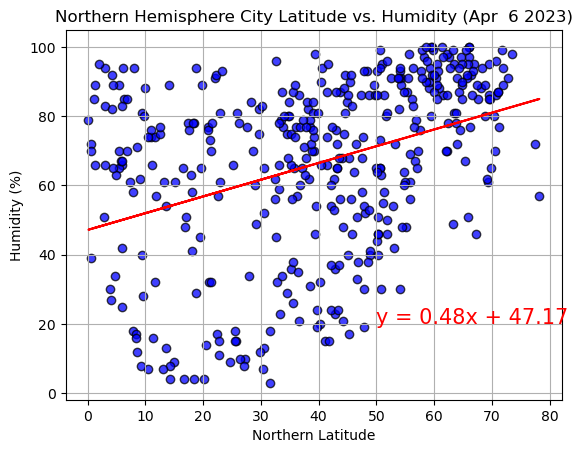

In [33]:
# Northern Hemisphere

x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Humidity ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(50,20),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/Fig8.png")


The r-value is: 0.2823571051240103


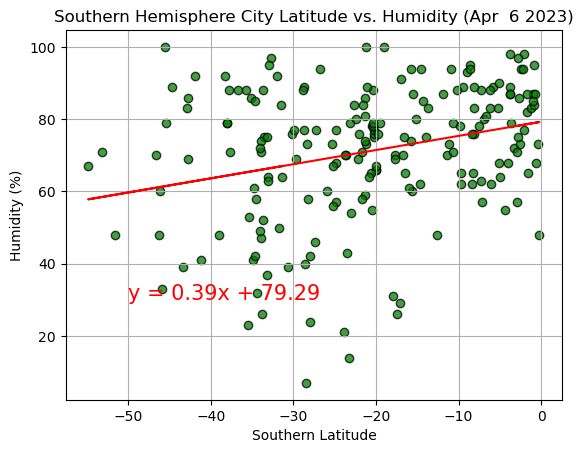

In [34]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "green", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Humidity ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/Fig9.png")

**Discussion about the linear relationship:**
A clear correlation is only identifiable starting with humitidy at 60%. The linear regression indicates increased humidy 
with increasing latitude. The corelation between humidity and latitude is that humidity increase is double of latitude increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1641009048623856


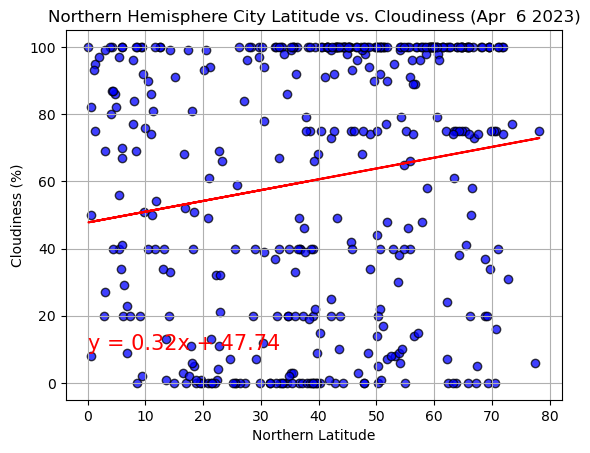

In [37]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/Fig10.png")

The r-value is: 0.29689888890414784


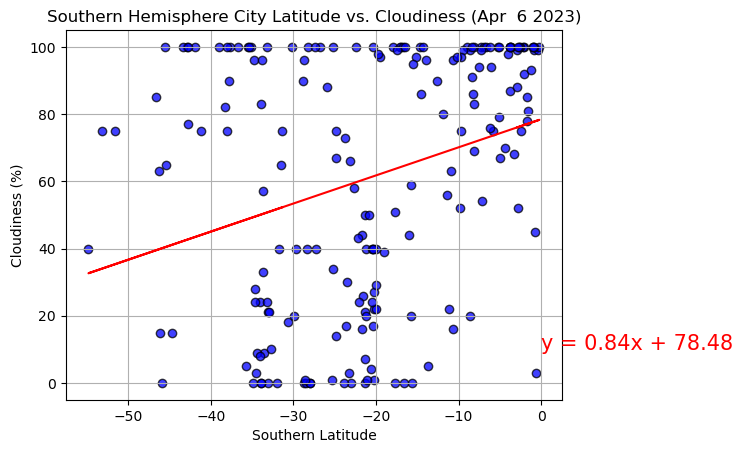

In [38]:
# Southern Hemisphere

x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/Fig11.png")

**Discussion about the linear relationship:** 
The linear regression shows an increase of cloudiness with increasing latitude, however, 
the city data is too spread across to identify a clear pattern. The correlation between the Cloudiness 
and latitue is that the cloudiness percentage increase is doubled with increasing latititude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03831631319236104


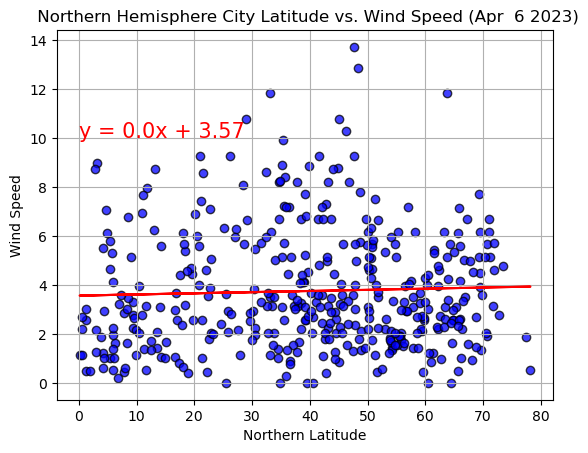

In [39]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.title(f" Northern Hemisphere City Latitude vs. Wind Speed ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/Fig12.png")

The r-value is: -0.4437553754221475


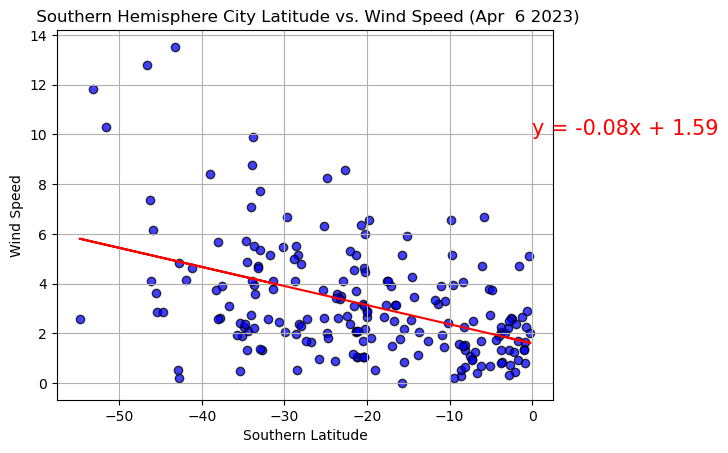

In [40]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.title(f" Southern Hemisphere City Latitude vs. Wind Speed ({plot_date} {plot_year})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/Fig13.png")

**Discussion about the linear relationship:** 
This linear regression indicates, with the increasing latitude the wind speed is reduced. 
For every increase in latitiude the wind speed is reduces.